In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath('..'))
from rubiks.Plotter import *

In [9]:
df = pd.read_csv('../data/linear.csv')

X = df['ps']
Y = df['fs']

#linearRPlot(X=X, Y=Y, weight=0.8, bias=0.5)
print(X)
print(len(X))
X = np.array(X).reshape(-1, 1)
z = 2 * X
print(z)

0     90
1     87
2    100
3     78
4     75
5     74
6     70
7     50
8     20
9     12
Name: ps, dtype: int64
10
[[180]
 [174]
 [200]
 [156]
 [150]
 [148]
 [140]
 [100]
 [ 40]
 [ 24]]


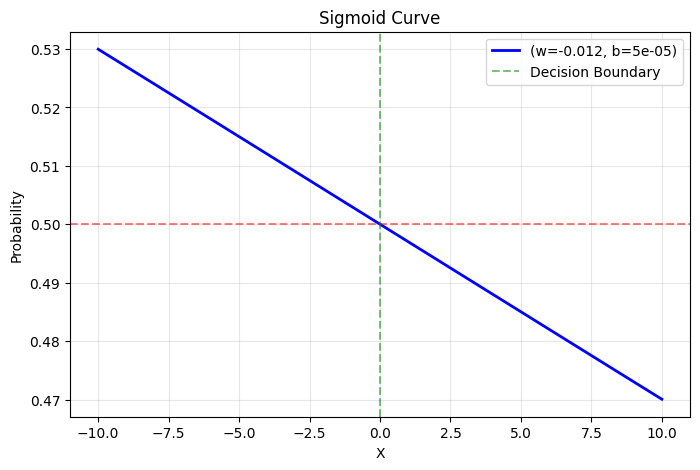

In [3]:
LogisticPlot(weight=-0.012, bias=0.00005)

In [16]:
dfLogistic = pd.read_csv('../data/logistic.csv')

X = dfLogistic['value']
Y = dfLogistic['status']

x = np.array(X).reshape(-1, 1)
y = np.array(Y).reshape(-1, 1)
w = 0
b = 0
lr = 0.001
m = len(X)

print(50*"=")
print(f"w = {w}")
print(f"b = {b}")
print(f"lr = {lr}")
print(f"m = {m}")
print(50*"=")

z = (w * x) + b
print(f"z =\n{z}")
prob = 1 / (1 + np.exp(-z))
print(f"Probabillity =\n{prob}")
error = prob - y
print(f"Error = \n{error}")
db = np.sum(error) / m
print(f"db = {db}")
dw = np.sum(x * error) / m
print(f"dw = {dw}")
w = w - (lr * dw)
b = b - (lr * db)
print(f"w = {w}")
print(f"b = {b}")

w = 0
b = 0
lr = 0.001
m = 9
z =
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
Probabillity =
[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]
Error = 
[[-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [-0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]]
db = -0.05555555555555555
dw = -12.0
w = 0.012
b = 5.555555555555555e-05


In [64]:
class LogisticRegression:
    def __init__(self, x, y):
        self.bias = 0.0
        self.weight = 0.0
        self.x = np.array(x).reshape(-1, 1)
        self.y = np.array(y).reshape(-1, 1)
        
    def train(self, maxIter, lr, tol):
        m = len(self.x)
        self.P = lambda za: 1 / (1 + np.exp(-za))
        lossB = np.inf
        for i in range(maxIter):
            z = self.weight * self.x + self.bias
            yPred = self.P(z)
            yPred = np.clip(yPred, 1e-15, 1 - 1e-15)
            
            lossN = -(1/m) * np.sum(self.y * np.log(yPred) + (1 - self.y) * np.log(1 - yPred))
            
            if abs(lossB - lossN) < tol:
                print(f"Convergen at iteration-{i}")
                break
            
            lossB = lossN
            
            error = yPred - self.y
            dw = np.sum(self.x * error) / m
            db = np.sum(error) / m

            self.weight -= lr * dw
            self.bias -= lr * db
                
        return self.weight, self.bias
    
    def predict(self, x):
        z = self.weight * x + self.bias
        P = self.P(z)
        return P

dfLogistic = pd.read_csv('../data/logistic.csv')

X = dfLogistic['value']
Y = dfLogistic['status']

model = LogisticRegression(X, Y)
weight, bias = model.train(lr=0.001, maxIter=70000, tol=1e-6)
print(f"weight: {weight}\nbias: {bias}")

input = np.array([10, 20, 30, 40, 50, 60, 70, 74, 75, 80, 90, 100])
for n in input:
    ypred = round(model.predict(n).item(), 3)
    if ypred >= 0.5:
        ypred = 1
    else:
        ypred = 0
    print(f"Input {n}:\nPredict: {ypred}")

weight: 0.059255594612638254
bias: -3.8925003662757502
Input 10:
Predict: 0
Input 20:
Predict: 0
Input 30:
Predict: 0
Input 40:
Predict: 0
Input 50:
Predict: 0
Input 60:
Predict: 0
Input 70:
Predict: 1
Input 74:
Predict: 1
Input 75:
Predict: 1
Input 80:
Predict: 1
Input 90:
Predict: 1
Input 100:
Predict: 1
